# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
#%pip install seaborn
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

# Data loading

In [2]:
X_train = pd.read_csv("../../data/kaggle-competitions/loan/loan-10k.lrn.csv", index_col="ID")
y_train = pd.read_csv("../../data/kaggle-competitions/loan/loan-10k.sol.ex.csv", index_col="ID")
X_valid = pd.read_csv("../../data/kaggle-competitions/loan/loan-10k.tes.csv", index_col="ID")

### Metrics function

In [3]:
X_train

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,...,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year,grade
ID,,,,,,,,,,,,,,,,,,,,,
24341,12500.0,12500.0,12500.0,36 months,7.21,387.17,< 1 year,MORTGAGE,81000.0,Not Verified,...,N,6,2018,6,2000,2,2019,2,2019,A
67534,33850.0,33850.0,33775.0,60 months,20.99,915.57,1 year,MORTGAGE,80000.0,Source Verified,...,N,10,2015,9,1984,2,2019,2,2019,E
35080,10000.0,10000.0,10000.0,60 months,20.00,264.94,< 1 year,RENT,36580.0,Not Verified,...,N,9,2017,10,2006,1,2018,11,2018,D
4828,20250.0,20250.0,20250.0,36 months,14.31,695.15,9 years,RENT,48700.0,Source Verified,...,N,0,2015,6,1996,6,2016,9,2017,C
59259,25000.0,25000.0,25000.0,36 months,14.99,866.52,1 year,MORTGAGE,85000.0,Source Verified,...,N,11,2016,0,2002,2,2019,2,2019,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6644,20000.0,20000.0,20000.0,60 months,16.02,486.58,5 years,OWN,54000.0,Verified,...,N,8,2017,11,1991,2,2019,2,2019,C
25910,7500.0,7500.0,7500.0,36 months,9.49,240.22,10+ years,RENT,46386.0,Source Verified,...,N,10,2014,4,2004,3,2017,6,2018,B
95698,20750.0,20750.0,20750.0,60 months,15.05,494.19,< 1 year,RENT,185000.0,Source Verified,...,N,4,2017,2,2004,2,2019,2,2019,C


In [4]:
y_train

,grade
ID,
3582,B
60498,B
53227,B
21333,B
3885,B
...,...
89555,B
88135,B
51888,B


In [5]:
y = X_train["grade"]
X = X_train.drop("grade", axis=1)

### Target value distribution

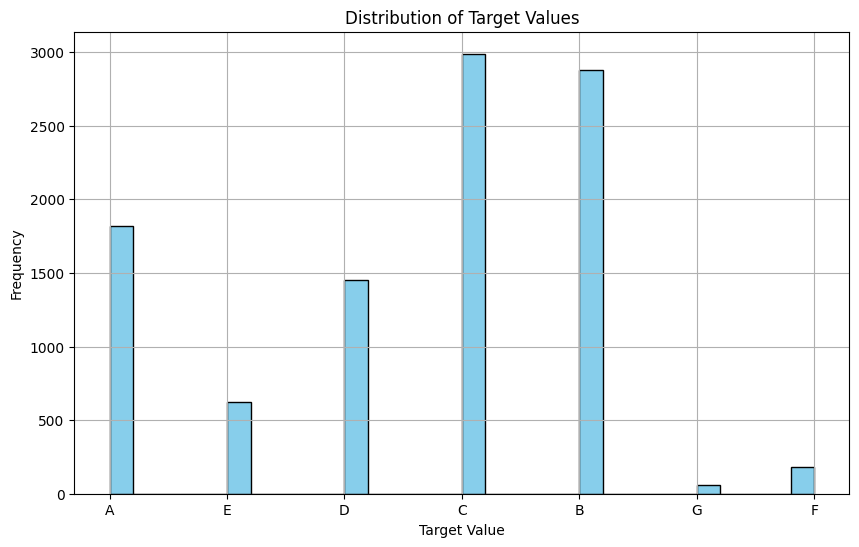

In [6]:
plt.figure(figsize=(10, 6)) # Set the size of the plot
plt.hist(y, bins=30, edgecolor='black', color='skyblue') # Increase number of bins for finer distribution, add edge color for clarity
plt.title('Distribution of Target Values') # Add a title
plt.xlabel('Target Value') # Label for x-axis
plt.ylabel('Frequency') # Label for y-axis
plt.grid(True) # Add a grid for easier readability
plt.show()

### Global parameters

In [7]:
seed = 1183744
test_size = 0.2
shuffle_train_test = True

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, shuffle=shuffle_train_test)

In [9]:
pd.DataFrame({
    "Column Name": X_train.columns,
    "Min value": X_train.min(),
    "Max value": X_train.max()
})

,Column Name,Min value,Max value
loan_amnt,loan_amnt,1000.0,40000.0
funded_amnt,funded_amnt,1000.0,40000.0
funded_amnt_inv,funded_amnt_inv,1000.0,40000.0
term,term,36 months,60 months
int_rate,int_rate,5.31,30.99
...,...,...,...
earliest_cr_line_year,earliest_cr_line_year,1965,2015
last_pymnt_d_month,last_pymnt_d_month,0,11
last_pymnt_d_year,last_pymnt_d_year,2012,2019
last_credit_pull_d_month,last_credit_pull_d_month,0,11


In [10]:
def calculate_performance_metrics(y_test, y_pred, class_names=None):        
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    return pd.Series({
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })
    
def calculate_per_class_accuracy(y_test, y_pred, class_names=None):
    if class_names is None:
        class_names = y_test.unique()
        
    present_classes = list(filter(lambda name: y_test.str.contains(name).any(), class_names))
    
    cm = confusion_matrix(y_test, y_pred)
    accuracies = np.divide(cm.diagonal(), cm.sum(axis=1))
    
    return pd.Series(accuracies[~np.isnan(accuracies)], index=present_classes)

# Data preprocessing

In [11]:
#Check for missing values
missing_values = X_train.isnull().sum()

# Print the count of missing values for each column
print(missing_values)

loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
                           ..
earliest_cr_line_year       0
last_pymnt_d_month          0
last_pymnt_d_year           0
last_credit_pull_d_month    0
last_credit_pull_d_year     0
Length: 90, dtype: int64


In [12]:
nan = X_train.isna()
print(nan)

       loan_amnt  funded_amnt  funded_amnt_inv   term  int_rate  installment  \
ID                                                                             
91267      False        False            False  False     False        False   
44658      False        False            False  False     False        False   
91263      False        False            False  False     False        False   
97751      False        False            False  False     False        False   
60967      False        False            False  False     False        False   
...          ...          ...              ...    ...       ...          ...   
47670      False        False            False  False     False        False   
44682      False        False            False  False     False        False   
64006      False        False            False  False     False        False   
24453      False        False            False  False     False        False   
9168       False        False           

In [13]:
#Check for missing values
missing_values = X_test.isnull().sum()

# Print the count of missing values for each column
print(missing_values)

loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
term                        0
int_rate                    0
                           ..
earliest_cr_line_year       0
last_pymnt_d_month          0
last_pymnt_d_year           0
last_credit_pull_d_month    0
last_credit_pull_d_year     0
Length: 90, dtype: int64


In [14]:
nan = X_test.isna()
print(nan)

       loan_amnt  funded_amnt  funded_amnt_inv   term  int_rate  installment  \
ID                                                                             
35280      False        False            False  False     False        False   
68930      False        False            False  False     False        False   
32793      False        False            False  False     False        False   
89056      False        False            False  False     False        False   
59934      False        False            False  False     False        False   
...          ...          ...              ...    ...       ...          ...   
29747      False        False            False  False     False        False   
26385      False        False            False  False     False        False   
18157      False        False            False  False     False        False   
45389      False        False            False  False     False        False   
17166      False        False           

In [15]:
value = X_train["term"].value_counts()
print(value)

 36 months    5181
 60 months    2319
Name: term, dtype: int64


## Remove missing values

In [16]:
#There are no missing values

## Map all booleans to their data type

In [17]:
conversion_dict = {'n': False, 'N': False, 'y': True, 'Y': True}

# List of columns to convert
columns_to_convert = ["pymnt_plan", "debt_settlement_flag", "hardship_flag"]

# Apply the conversion to each specified column
for column in columns_to_convert:
    if column in X_train.columns:  # Check if the column exists in the DataFrame
        X_train[column] = X_train[column].map(conversion_dict)

In [18]:
# Apply the conversion to each specified column
for column in columns_to_convert:
    if column in X_test.columns:  # Check if the column exists in the DataFrame
        X_test[column] = X_test[column].map(conversion_dict)
    if column in X_valid.columns:
        X_valid[column] = X_valid[column].map(conversion_dict)

## Map categorical values to string representations

In [19]:
#For clarification, what theses terms mean.
X_train['initial_list_status'] = X_train['initial_list_status'].replace({'w': 'Whole loan', 'f': 'Fractional loan'})

In [20]:
X_test['initial_list_status'] = X_test['initial_list_status'].replace({'w': 'Whole loan', 'f': 'Fractional loan'})

In [21]:
X_valid['initial_list_status'] = X_valid['initial_list_status'].replace({'w': 'Whole loan', 'f': 'Fractional loan'})

## Show preprocessed data

In [22]:
X_train

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,...,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
ID,,,,,,,,,,,,,,,,,,,,,
91267,9850.0,9850.0,9850.0,36 months,16.29,347.71,9 years,RENT,62000.0,Source Verified,...,Cash,False,8,2014,3,2003,11,2015,2,2019
44658,16000.0,16000.0,16000.0,36 months,10.91,523.14,5 years,RENT,60000.0,Not Verified,...,Cash,False,10,2017,9,1998,2,2019,2,2019
91263,12000.0,12000.0,12000.0,60 months,13.44,275.75,10+ years,MORTGAGE,75000.0,Source Verified,...,Cash,False,11,2015,2,1998,1,2019,2,2019
97751,12000.0,12000.0,12000.0,36 months,14.99,415.93,7 years,RENT,48000.0,Verified,...,Cash,False,10,2014,11,2003,11,2015,2,2019
60967,10000.0,10000.0,9950.0,36 months,9.16,318.75,< 1 year,RENT,55000.0,Source Verified,...,Cash,False,1,2016,10,2003,1,2019,2,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47670,20000.0,20000.0,20000.0,60 months,19.22,521.24,5 years,OWN,85000.0,Verified,...,Cash,False,0,2014,10,1991,8,2014,2,2015
44682,22675.0,22675.0,22625.0,36 months,13.99,774.87,1 year,MORTGAGE,170000.0,Verified,...,Cash,False,11,2016,1,2003,7,2017,1,2018
64006,6000.0,6000.0,6000.0,36 months,15.31,208.91,< 1 year,RENT,44000.0,Not Verified,...,Cash,False,3,2013,9,2002,3,2016,4,2018


In [23]:
X_test

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,...,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
ID,,,,,,,,,,,,,,,,,,,,,
35280,10000.0,10000.0,10000.0,36 months,7.89,312.86,2 years,MORTGAGE,50000.0,Source Verified,...,Cash,False,4,2016,10,1988,2,2019,2,2019
68930,6000.0,6000.0,6000.0,36 months,10.49,194.99,1 year,RENT,60000.0,Source Verified,...,Cash,False,8,2016,2,2010,2,2019,2,2019
32793,3875.0,3875.0,3875.0,36 months,14.08,132.59,< 1 year,RENT,15000.0,Verified,...,Cash,False,11,2017,6,2011,2,2019,10,2018
89056,21075.0,21075.0,21075.0,36 months,16.02,741.15,10+ years,MORTGAGE,120000.0,Source Verified,...,Cash,False,6,2017,2,1974,2,2019,2,2019
59934,12000.0,12000.0,12000.0,60 months,14.08,279.72,6 years,RENT,47000.0,Source Verified,...,Cash,False,7,2017,8,2003,11,2018,2,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29747,25000.0,25000.0,25000.0,60 months,14.52,588.47,5 years,RENT,124000.0,Source Verified,...,Cash,False,5,2018,11,2007,2,2019,2,2019
26385,15000.0,15000.0,15000.0,36 months,9.44,480.08,1 year,RENT,160000.0,Not Verified,...,Cash,False,1,2018,7,1988,2,2019,2,2019
18157,18400.0,18400.0,18400.0,36 months,6.99,568.06,< 1 year,RENT,150000.0,Not Verified,...,Cash,False,6,2016,11,1992,2,2019,2,2019


In [24]:
X_valid

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,...,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
ID,,,,,,,,,,,,,,,,,,,,,
3582,10000.0,10000.0,10000.0,36 months,9.93,322.35,< 1 year,MORTGAGE,130000.0,Not Verified,...,Cash,False,9,2017,8,2006,2,2019,2,2019
60498,20000.0,20000.0,20000.0,60 months,13.67,461.96,10+ years,MORTGAGE,75500.0,Not Verified,...,Cash,False,3,2016,3,2002,0,2018,2,2019
53227,15000.0,15000.0,15000.0,36 months,11.80,496.79,< 1 year,RENT,38000.0,Source Verified,...,Cash,False,11,2018,9,2004,2,2019,2,2019
21333,12500.0,12500.0,12500.0,36 months,15.31,435.22,10+ years,MORTGAGE,65000.0,Source Verified,...,Cash,False,4,2013,10,1996,4,2016,2,2018
3885,19000.0,19000.0,19000.0,60 months,27.88,590.21,6 years,MORTGAGE,38000.0,Verified,...,Cash,False,10,2015,1,2001,4,2016,2,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89555,14450.0,14450.0,14450.0,60 months,13.33,331.23,6 years,RENT,49500.0,Source Verified,...,Cash,False,6,2015,3,1997,7,2016,0,2019
88135,25000.0,25000.0,25000.0,36 months,10.72,815.16,3 years,MORTGAGE,92000.0,Not Verified,...,Cash,False,11,2018,5,1987,2,2019,2,2019
51888,20000.0,20000.0,20000.0,36 months,14.46,688.03,4 years,MORTGAGE,85250.0,Source Verified,...,Cash,False,5,2016,5,1999,7,2017,2,2019


In [25]:
data_types = X_train.dtypes

# Select columns that are float or int type and not binary (assuming binary columns are represented as int with values 0 and 1)
numerical_columns = data_types[(data_types == 'float64') | ((data_types == 'int64') & (X_train.nunique() > 2))].index.tolist()

# Columns that appear to be numerical (floats or non-binary ints)
numerical_columns

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_inq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev

In [26]:
columns_to_scale = [
    'loan_amnt',
    'funded_amnt',
    'funded_amnt_inv',
    'int_rate',
    'installment',
    'annual_inc',
    'dti',
    'fico_range_low',
    'fico_range_high',
    'revol_bal',
    'revol_util',
    'total_acc',
    'out_prncp',
    'out_prncp_inv',
    'total_pymnt',
    'total_pymnt_inv',
    'total_rec_prncp',
    'total_rec_int',
    'total_rec_late_fee',
    'last_pymnt_amnt',
    'tot_cur_bal',
    'total_rev_hi_lim',
    'avg_cur_bal',
    'bc_open_to_buy',
    'bc_util'
]

In [27]:
# Drop the 'policy_code' column from X_train, X_valid, and X_test before applying transformations
X_train = X_train.drop("policy_code", axis=1)
X_test = X_test.drop("policy_code", axis=1)

# Experiments

## Global parameters

In [28]:
folds = 3
scaler = StandardScaler()
scale_features = columns_to_scale 
category_encoder = OneHotEncoder()
category_features = ["emp_length", "term","application_type"
                     ,"disbursement_method","loan_status","verification_status"
                     ,"initial_list_status", "home_ownership","purpose","addr_state"]

In [29]:
# Update the OneHotEncoder to ignore unknown categories
category_encoder = OneHotEncoder(handle_unknown='ignore')

column_transformer = make_column_transformer(
    (scaler, scale_features),  
    (category_encoder, category_features), 
    remainder="passthrough"
)

column_transformer.fit(X_train)

# Transform the datasets
X_train_transformed = column_transformer.transform(X_train)
X_train = pd.DataFrame(X_train_transformed, columns=column_transformer.get_feature_names_out())

X_test_transformed = column_transformer.transform(X_test)
X_test = pd.DataFrame(X_test_transformed, columns=column_transformer.get_feature_names_out())

X_valid_transformed = column_transformer.transform(X_valid)
X_valid = pd.DataFrame(X_valid_transformed, columns=column_transformer.get_feature_names_out(), index=X_valid.index)

In [30]:
#ensure columns match
assert list(X_train.columns) == list(X_test.columns)
assert list(X_valid.columns) == list(X_valid.columns)

In [31]:
# Check the number of unique classes in the original y_train
unique_classes = np.unique(y_train.values.ravel())
print(f"Unique classes in y_train before encoding: {unique_classes}")

# Now perform label encoding
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train.values.ravel())

# Now perform label encoding
y_test_encoded = label_encoder.fit_transform(y_test.values.ravel())

# Check the number of unique classes in the encoded y_train
unique_encoded_classes = np.unique(y_train_encoded)
print(f"Unique classes in y_train after encoding: {unique_encoded_classes}")

# If the number of unique_encoded_classes is greater than 1, you can fit the classifier
if len(unique_encoded_classes) > 1:
    perceptron_classifier = Perceptron(random_state=seed)
    perceptron_classifier.fit(X_train, y_train_encoded)
else:
    print("Error: There is only one class after encoding. Cannot fit the classifier.")

Unique classes in y_train before encoding: ['A' 'B' 'C' 'D' 'E' 'F' 'G']
Unique classes in y_train after encoding: [0 1 2 3 4 5 6]


## Perceptron

### Training

In [32]:
# Initialize the Perceptron
perceptron_classifier = Perceptron(random_state=seed)

# Fit the classifier on the training data
perceptron_classifier.fit(X_train, y_train_encoded)

Perceptron(random_state=1183744)

### Print prediction

In [33]:
# Make predictions on the test data
y_pred_perceptron = perceptron_classifier.predict(X_test)

In [34]:
scores_per = cross_val_score(perceptron_classifier, X_train, y_train_encoded, cv=5) 

print("Accuracy for each fold:", scores_per)
print("Mean accuracy:", scores_per.mean())
print("Standard deviation:", scores_per.std())

Accuracy for each fold: [0.30066667 0.29266667 0.25666667 0.312      0.18266667]
Mean accuracy: 0.26893333333333336
Standard deviation: 0.046941287204809855


In [35]:
calculate_performance_metrics(y_test_encoded,y_pred_perceptron)

/home/tobsel/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy     0.255200
Precision    0.148889
Recall       0.255200
F1 Score     0.159871
dtype: float64

## Gaussian Naive Bayes

### Training

In [36]:
# Initialize the Gaussian Naive Bayes classifier
gaussian_nb_classifier = GaussianNB()

# Fit the classifier on the training data
gaussian_nb_classifier.fit(X_train, y_train_encoded)

GaussianNB()

### Prediction

In [37]:
# Make predictions on the test data
y_pred_gaussian_nb = gaussian_nb_classifier.predict(X_test)

### Print predictions

In [38]:
scores_nb = cross_val_score(gaussian_nb_classifier, X_train, y_train_encoded, cv=5) 

print("Accuracy for each fold:", scores_nb)
print("Mean accuracy:", scores_nb.mean())
print("Standard deviation:", scores_nb.std())

Accuracy for each fold: [0.24133333 0.22266667 0.262      0.21066667 0.254     ]
Mean accuracy: 0.2381333333333333
Standard deviation: 0.01910625261240123


In [39]:
pd.Series(cross_val_score(estimator=gaussian_nb_classifier,X=X_train,y=y_train,cv=folds))

0    0.2384
1    0.2660
2    0.2144
dtype: float64

In [40]:
calculate_performance_metrics(y_test_encoded,y_pred_gaussian_nb)

Accuracy     0.240000
Precision    0.276171
Recall       0.240000
F1 Score     0.160899
dtype: float64

### Visualisation

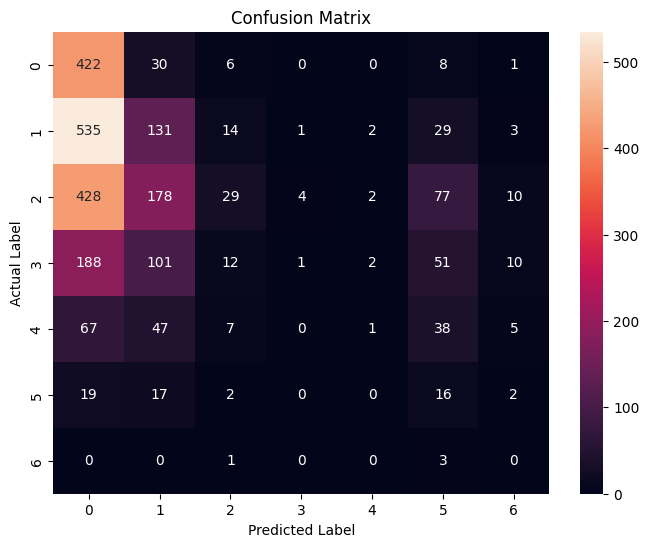

In [41]:
cm = confusion_matrix(y_test_encoded, y_pred_gaussian_nb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()



## Decision Tree

In [42]:
# Initialize the Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=seed)

### Training

In [43]:
# Fit the classifier on the training data
decision_tree_classifier.fit(X_train, y_train_encoded)

DecisionTreeClassifier(random_state=1183744)

### Prediction

In [44]:
# Make predictions on the test data
y_pred_decision_tree = decision_tree_classifier.predict(X_test)

In [45]:
import csv

# Assuming you have an array or list of IDs like this:
ids = X_valid.index.values  # Replace with your list/array of IDs
# Combine the IDs with the corresponding predictions
predictions = list(zip(ids, label_encoder.inverse_transform(decision_tree_classifier.predict(X_valid))))
# Specify the filename for your CSV
filename = '../../doc/submissions/kaggle-competitions/loan/decision_tree.csv'

# Writing to csv file
with open(filename, 'w', newline='') as csvfile:
    # Create a csv writer object
    csvwriter = csv.writer(csvfile)

    # Write the headers (adjust as per Kaggle's requirement)
    csvwriter.writerow(['ID', 'grade'])

    # Write the data rows
    csvwriter.writerows(predictions)

print(f'Submission saved to {filename}')



Submission saved to ../../doc/submissions/kaggle-competitions/loan/decision_tree.csv


### Print predictions

In [46]:
scores_tree = cross_val_score(decision_tree_classifier, X_train, y_train_encoded, cv=5) 

print("Accuracy for each fold:", scores_tree)
print("Mean accuracy:", scores_tree.mean())
print("Standard deviation:", scores_tree.std())

Accuracy for each fold: [0.97266667 0.98533333 0.98333333 0.98533333 0.97866667]
Mean accuracy: 0.9810666666666666
Standard deviation: 0.004855237721608805


In [47]:
calculate_performance_metrics(y_test_encoded,y_pred_decision_tree)

Accuracy     0.985200
Precision    0.986581
Recall       0.985200
F1 Score     0.985577
dtype: float64

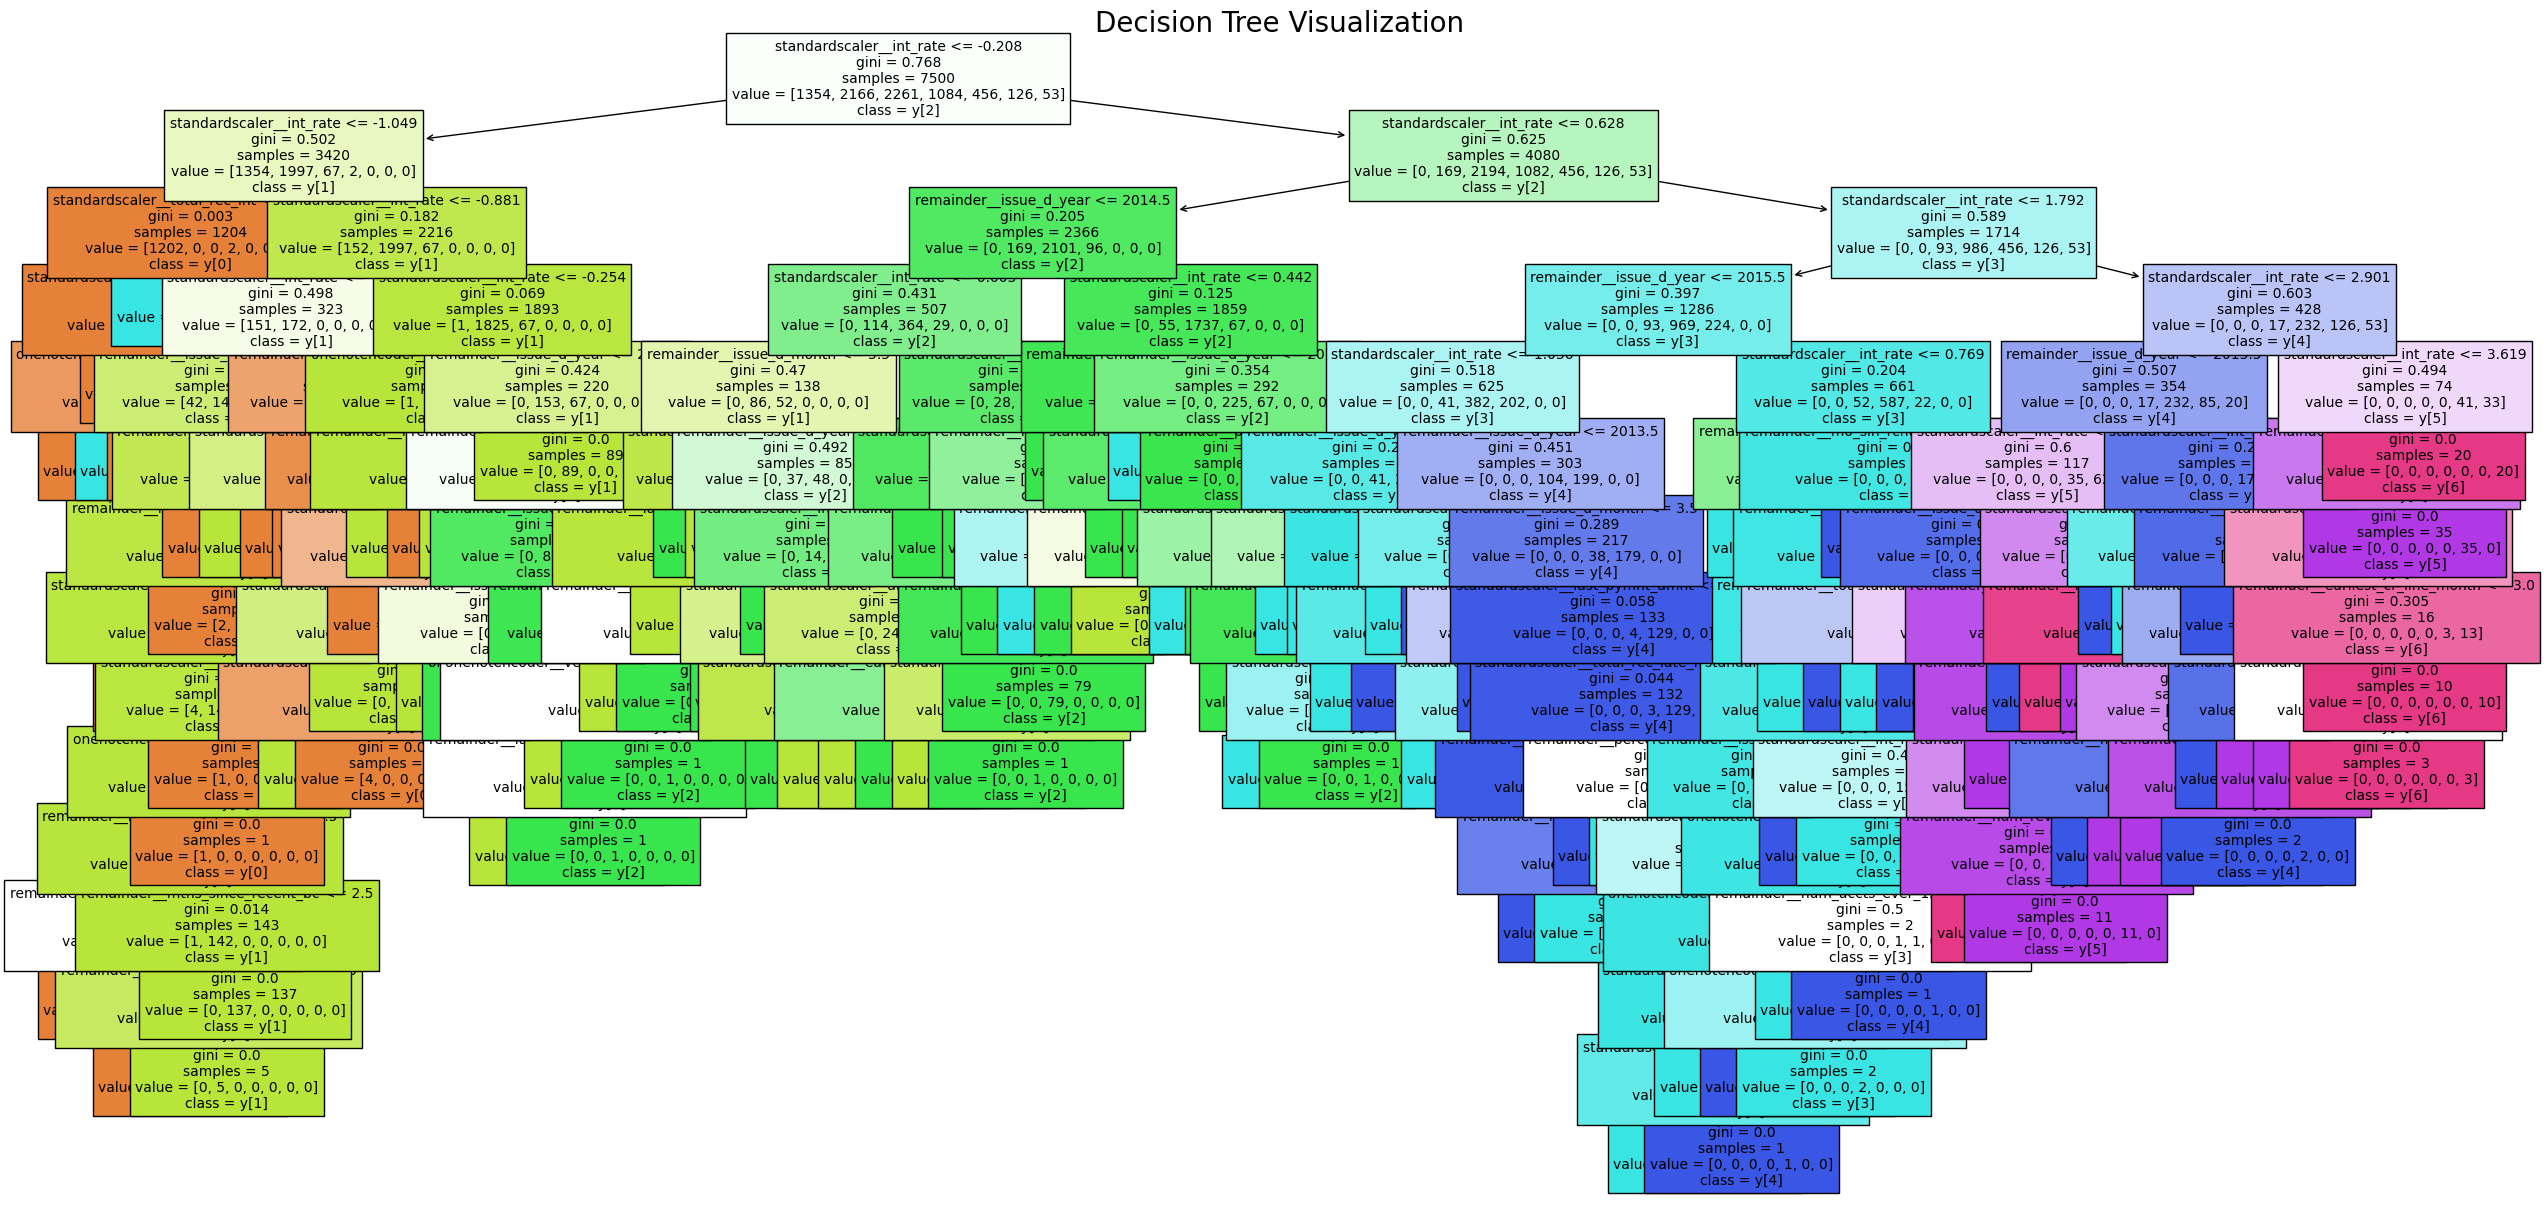

In [48]:
plt.figure(figsize=(30, 15), dpi=100)

# Plot the decision tree with larger font size for node labels
tree_plot = plot_tree(decision_tree_classifier, filled=True,
                      feature_names=X_train.columns, class_names=True,
                      fontsize=10)  # You can increase this value if needed

# Title for the tree
plt.title("Decision Tree Visualization", fontsize=20)

plt.show()

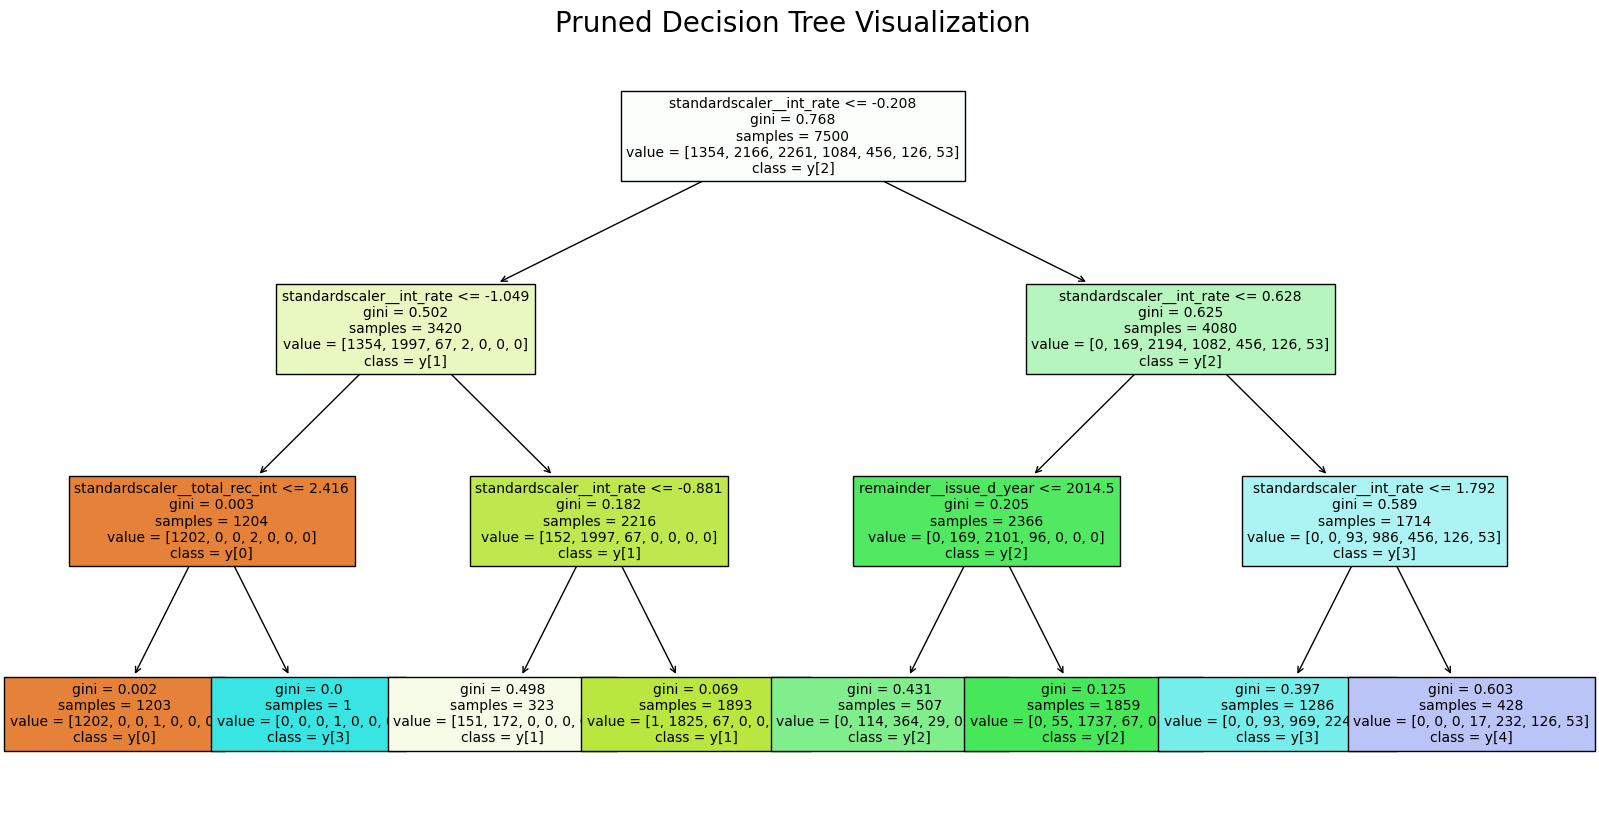

In [49]:
# Train the decision tree with limited depth
decision_tree_pruned = DecisionTreeClassifier(max_depth=3)  # Adjust as needed
decision_tree_pruned.fit(X_train, y_train_encoded)

# Plot the pruned tree
plt.figure(figsize=(20, 10), dpi=100)
plot_tree(decision_tree_pruned, filled=True, feature_names=X_train.columns, class_names=True, fontsize=10)
plt.title("Pruned Decision Tree Visualization", fontsize=20)
plt.show()

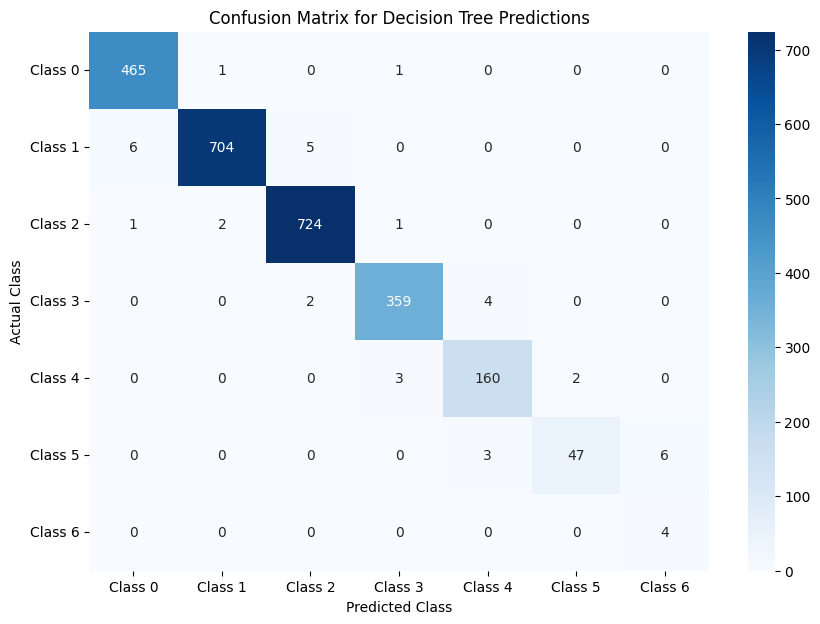

In [50]:
cm = confusion_matrix(y_test_encoded, y_pred_decision_tree)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Decision Tree Predictions')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')

# Add tick marks for clarity
class_labels = ['Class ' + str(i) for i in range(cm.shape[0])]
plt.xticks(np.arange(len(class_labels)) + 0.5, class_labels)
plt.yticks(np.arange(len(class_labels)) + 0.5, class_labels, rotation=0)

plt.show()